In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = 'drive/MyDrive/noise/station_month.csv'
with open(file_path,'r') as f:
  text = f.read()
  print(text)

﻿Station,Year,Month,Day,Night,DayLimit,NightLimit
BEN01,2011,2,66,56,55,45
BEN01,2011,3,66,58,55,45
BEN01,2011,4,66,57,55,45
BEN01,2011,5,66,56,55,45
BEN01,2011,6,67,57,55,45
BEN01,2011,7,67,57,55,45
BEN01,2011,8,67,59,55,45
BEN01,2011,9,66,56,55,45
BEN01,2011,10,66,56,55,45
BEN01,2011,11,66,56,55,45
BEN01,2011,12,67,58,55,45
BEN02,2011,2,56,52,65,55
BEN02,2011,3,57,52,65,55
BEN02,2011,4,56,52,65,55
BEN02,2011,5,57,53,65,55
BEN02,2011,6,59,54,65,55
BEN02,2011,7,60,56,65,55
BEN02,2011,8,58,58,65,55
BEN02,2011,9,55,54,65,55
BEN02,2011,10,54,53,65,55
BEN02,2011,11,55,53,65,55
BEN02,2011,12,55,53,65,55
BEN03,2011,2,64,51,55,45
BEN03,2011,3,53,46,55,45
BEN03,2011,4,54,47,55,45
BEN03,2011,5,56,48,55,45
BEN03,2011,6,60,51,55,45
BEN03,2011,7,59,48,55,45
BEN03,2011,8,58,48,55,45
BEN03,2011,9,57,48,55,45
BEN03,2011,10,55,47,55,45
BEN03,2011,11,55,47,55,45
BEN03,2011,12,55,46,55,45
BEN04,2011,2,65,58,65,55
BEN04,2011,3,65,58,65,55
BEN04,2011,4,65,58,65,55
BEN04,2011,5,65,58,65,55
BEN04,2011,6,68,

In [ ]:
data = pd.read_csv('drive/MyDrive/noise/station_month.csv')

In [ ]:
data = data.dropna()

In [ ]:
data.head()

,Station,Year,Month,Day,Night,DayLimit,NightLimit
0,BEN01,2011,2,66.0,56.0,55,45
1,BEN01,2011,3,66.0,58.0,55,45
2,BEN01,2011,4,66.0,57.0,55,45
3,BEN01,2011,5,66.0,56.0,55,45
4,BEN01,2011,6,67.0,57.0,55,45


In [ ]:
data.tail()

,Station,Year,Month,Day,Night,DayLimit,NightLimit
5000,MUM10,2018,8,73.0,69.0,65,55
5001,MUM10,2018,9,72.0,68.0,65,55
5002,MUM10,2018,10,73.0,68.0,65,55
5003,MUM10,2018,11,72.0,68.0,65,55
5004,MUM10,2018,12,72.0,68.0,65,55


In [ ]:
data.describe()

,Year,Month,Day,Night,DayLimit,NightLimit
count,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000
mean,2015.198999,6.538338,65.830631,60.430831,60.731732,51.543544
std,2.172580,3.434244,7.407644,8.172730,8.770542,10.173202
min,2011.000000,1.000000,31.000000,25.000000,50.000000,40.000000
25%,2014.000000,4.000000,61.000000,55.000000,50.000000,40.000000
50%,2016.000000,7.000000,66.000000,59.000000,65.000000,55.000000
75%,2017.000000,10.000000,71.000000,66.000000,65.000000,55.000000
max,2018.000000,12.000000,100.000000,103.000000,75.000000,70.000000


In [ ]:
data.isnull().sum()

Station       0
Year          0
Month         0
Day           0
Night         0
DayLimit      0
NightLimit    0
dtype: int64

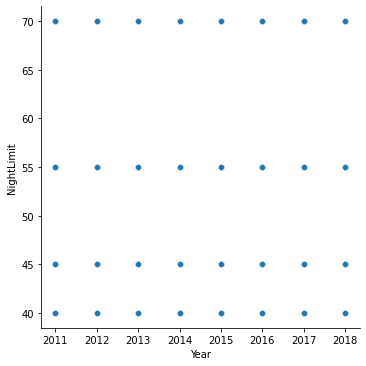

In [ ]:
sns.relplot(x='Year', y='NightLimit', data=data)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.iloc[:,[0,1,2,4]].values
y = data.iloc[:,3].values
print(X)
print(y)

[['BEN01' 2011 2 56.0]
 ['BEN01' 2011 3 58.0]
 ['BEN01' 2011 4 57.0]
 ...
 ['MUM10' 2018 10 68.0]
 ['MUM10' 2018 11 68.0]
 ['MUM10' 2018 12 68.0]]
[66. 66. 66. ... 73. 72. 72.]


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [ ]:
print(X)

[[0 2011 2 56.0]
 [0 2011 3 58.0]
 [0 2011 4 57.0]
 ...
 [69 2018 10 68.0]
 [69 2018 11 68.0]
 [69 2018 12 68.0]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
regr = LinearRegression()

In [ ]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred = regr.predict(X_test)

In [ ]:
pred

array([55.16370595, 65.44357795, 73.86966503, ..., 72.18738058,
       59.64693079, 60.99129333])

In [ ]:
print(pred)

[55.16370595 65.44357795 73.86966503 ... 72.18738058 59.64693079
 60.99129333]


In [ ]:
regr.score(X_test, y_test)

0.8121257520233378